# FRAUD DELECTION

We import all the necessary headers first

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import random

import sklearn
import tensorflow as tf
import imblearn

In [3]:
# from pandas_ml import ConfusionMatrix
# import pandas_ml as pdml
from sklearn.metrics import confusion_matrix as ConfusionMatrix

# this is a known issue in spenc and should be resolved shortly. 
# The short term fix is to downgrade to scikit-learn 0.22, e.g.
# !conda install scikit-learn=0.22

In [4]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

### We use pandas for importing the dataset 'creditcard.csv'
This dataset is found on Kaggle: https://www.kaggle.com/dalpozz/creditcardfraud 

The description of the datset on the website is as follows:

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used fogir example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group of ULB on big data mining and fraud detection.
Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [5]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,11021.0,1.182005,-0.153431,0.722502,0.153742,-0.661895,-0.319719,-0.536350,-0.023061,1.541556,...,-0.025873,0.084140,-0.084748,0.025910,0.202255,1.032111,-0.100026,-0.004202,39.00,0
1,38372.0,1.243634,-0.872187,0.073182,-1.656876,-1.016949,-0.529813,-0.554376,0.013781,-0.038651,...,-0.133335,0.109502,-0.111580,0.002966,0.560982,-0.513979,0.073656,0.017279,48.00,0
2,75697.0,1.142253,0.059109,0.119010,0.709171,-0.346604,-0.909180,0.227785,-0.139933,0.031496,...,0.001997,-0.067217,-0.010652,0.407985,0.401857,0.376682,-0.049313,0.010164,42.81,0
3,64497.0,-3.141003,-0.036423,0.856031,1.320876,-1.720489,0.500438,-0.410874,1.402324,-0.624236,...,0.154052,0.234413,0.182089,0.037901,0.358644,-0.271475,-0.220354,-0.604723,141.09,0
4,124332.0,-0.116721,0.858464,-2.536733,-0.466711,0.945166,-1.017192,1.956131,-0.079841,-0.664298,...,0.575641,1.525651,0.349897,0.477377,-1.047446,0.375000,0.319410,0.334579,163.87,0


In [6]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("Fraud data points:\t", len(frauds), "\nNon-Fraudulent:\t\t", len(non_frauds))

Fraud data points:	 492 
Non-Fraudulent:		 284315


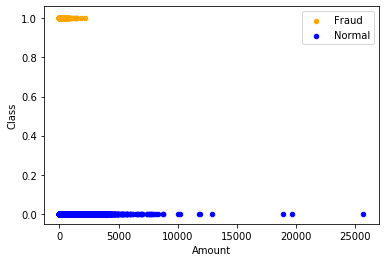

This feature looks important based on their distribution with respect to class.


In [7]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")

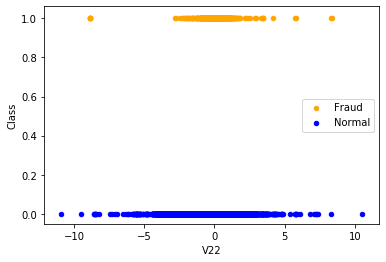

This feature may not be very important because of the similar distribution.


In [8]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

In [9]:
X = df.iloc[:,:-1]
y = df['Class']
print("X and y sizes, respectively:", len(X), len(y))

X and y sizes, respectively: 284807 284807


## Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 162 0.0016251517309872295
Number of frauds on y_train: 330 0.0017825889673948273


In [11]:
logistic = linear_model.LogisticRegression(C=1e5,max_iter=500)
# increasing max iterations from default 100, because it fails to converge otherwise

logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9990971379272293


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

In [13]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
[[99502    19]
 [   71    91]]


## K-Means Clustering

In [14]:
X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=500)

In [15]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=2)

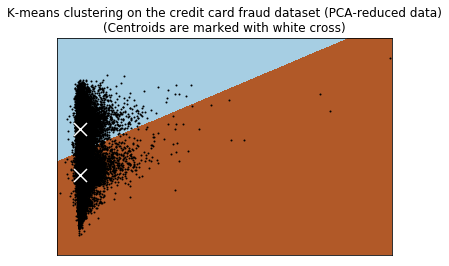

In [16]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          '(Centroids are marked with white cross)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
predictions = kmeans.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.45039207549980315
False negative rate (with respect to misclassifications):  0.0009873006039956636
False negative rate (with respect to all the data):  0.0005426282358198475
False negatives, false positives, mispredictions: 51 51605 51656
Total test data points: 93987


## Neural Networks

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


In [19]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


5964/5964 [==============================] - 15s 3ms/step - loss: 9.9205 - accuracy: 0.9951


In [21]:
print("Loss: ", model.evaluate(X_test.values, y_test, verbose=0))

Loss:  [0.3402717411518097, 0.9974783658981323]


In [22]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
[[93805    19]
 [  110    53]]
